# Remove outliers

In [124]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np

In [125]:
df1.shape

(8772, 30)

In [126]:
iso = IsolationForest(
        n_estimators=200,
        contamination=0.02,
        random_state=7,
        n_jobs=-1)

is_outlier = iso.fit_predict(df1.values) == -1

print(f'Remove {is_outlier.mean():.2%} points')

Remove 2.01% points


In [127]:
df1 = df1.loc[~is_outlier]

In [128]:
df1.shape

(8596, 30)

In [129]:
df1.to_csv('data_for_clusters.csv')

# Normalisation

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(df1)

In [132]:
df_norm = pd.DataFrame(X, columns=df1.columns, index=df1.index)
df_norm.to_csv('data_for_clusters_norm.csv')

In [133]:
df_norm.head()

,Мелкая бытовая техника,Аксессуары,Цифровая Техника,Климат,Сделай сам,Детские товары,ТВ-Аудио,Крупная бытовая техника,Товары для дома,Спорт и активный отдых,Мебель,"Игры, софт и развлечения",Автотовары,Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Южный ф.о.,Уральский ф.о.,Приволжский ф.о.,Дальневосточный ф.о.,СУММА СКИДКИ,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55575456-52485253545172,1.160155,1.219993,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,0.306473,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.633739
55575050-50535349495672,-0.486567,-0.544559,4.474704,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,0.542751,-0.395109,-0.095794,-0.040229,0.483190,-0.307744,0.931638,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,0.500058,2.109759
55574954-49565455575577,1.160155,-0.544559,2.053240,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,-0.943856,1.157351,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.109777,-0.184614,-0.474434,-0.729562
55574954-50515050575778,-0.486567,1.219993,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,1.877781,-0.05498,-0.025649,1.209917,-0.395109,-0.095794,-0.040229,1.195503,-0.307744,-0.943856,2.779624,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,4.388703,-0.474434,-0.681222
55575050-50485353485575,-0.486567,2.984546,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,0.306473,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.780418


# K-means

In [134]:
df = pd.read_csv('data_for_clusters_norm.csv')
df.set_index('id', inplace = True)

In [135]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

### Elbow method

In [136]:
from sklearn.metrics import pairwise_distances_argmin_min
distortions = []

for k in range(1, 16):
    km = KMeans(k, init='k-means++', n_init=20, max_iter=300, random_state=42).fit(X)
    distortions.append(km.inertia_ / X.shape[0])

In [137]:
from kneed import KneeLocator
k = range(1, len(distortions)+1)
kl = KneeLocator(k, distortions, curve='convex', direction='decreasing')
print('The elbow is', kl.elbow, '-th cluster')

The elbow is 9 -th cluster


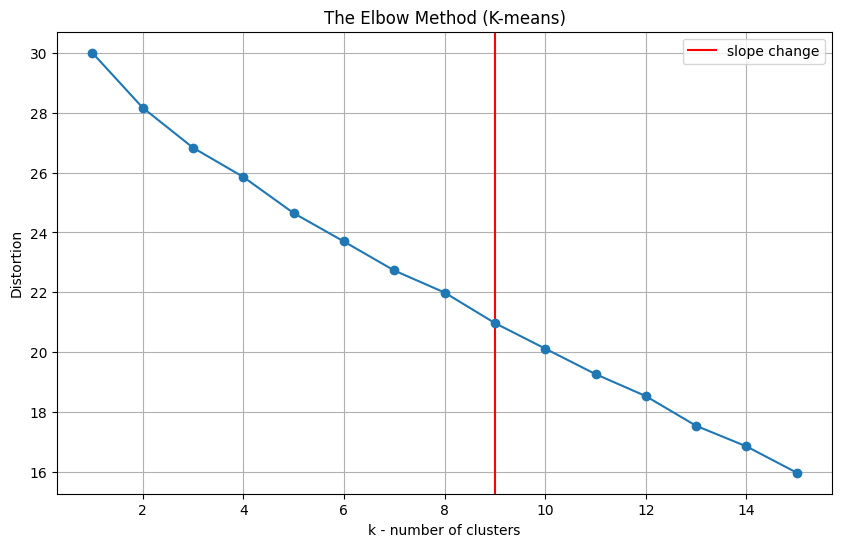

In [138]:
k_vals = range(1, len(distortions) + 1)

plt.figure(figsize=(10, 6))
plt.axvline(9, 0, 1, label='slope change', color='red')

plt.plot(k_vals, distortions, marker='o')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method (K-means)')
plt.grid(True)
plt.legend()
plt.show()


### Davis-Boulding

In [139]:
k_range  = range(2, 16)
db_score = []

for k in k_range:
    km = KMeans(k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = km.fit_predict(X)
    db_score.append(davies_bouldin_score(X, labels))

best_k = k_range[np.argmin(db_score)]

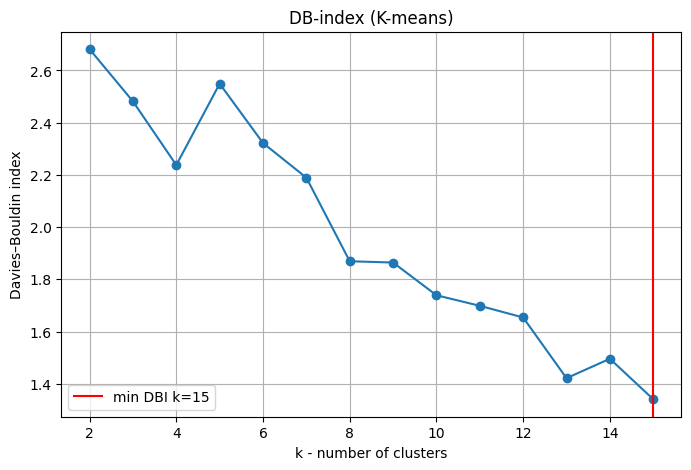

In [140]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_range, db_score, marker='o')
ax.axvline(best_k, color='red',
           label=f'min DBI k={best_k}')
ax.set(xlabel='k - number of clusters',
       ylabel='Davies–Bouldin index',
       title='DB-index (K-means)')
plt.grid(True)
ax.legend()
plt.show()

### Kalinski-Harabasz

In [141]:
k_range = range(2, 16)

# count the CH-index
ch_scores = []
for k in k_range:
    km = km = KMeans(k, init='k-means++', n_init=20, max_iter=300, random_state=42).fit(X)

    ch = calinski_harabasz_score(X, km.labels_)
    ch_scores.append(ch)
    print(f'k={k:2d},  CH={ch:,.1f}')

# find the maximum
best_k = k_range[np.argmax(ch_scores)]
best_ch = max(ch_scores)

k= 2,  CH=558.9
k= 3,  CH=507.4
k= 4,  CH=459.2
k= 5,  CH=466.4
k= 6,  CH=456.8
k= 7,  CH=457.8
k= 8,  CH=446.5
k= 9,  CH=461.8
k=10,  CH=468.2
k=11,  CH=477.9
k=12,  CH=482.6
k=13,  CH=507.7
k=14,  CH=514.6
k=15,  CH=537.7


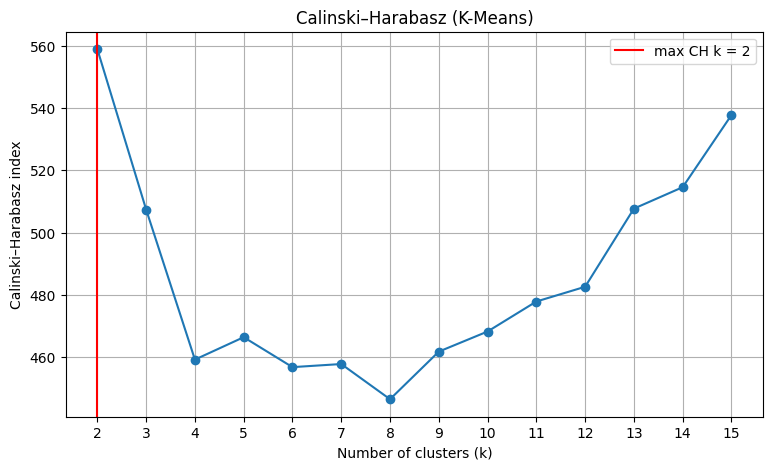

In [142]:
plt.figure(figsize=(9, 5))
plt.plot(k_range, ch_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski–Harabasz index')
plt.title('Calinski–Harabasz (K-Means)')
plt.grid(True)

plt.axvline(best_k, color='red', label=f'max CH k = {best_k}')
plt.legend()
plt.show()

### Silhouette

In [143]:
k_range = range(2, 16)
sil_score = []

for k in k_range:
    km = km = KMeans(k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = km.fit_predict(X)

    score = silhouette_score(
        X, labels,
        metric='euclidean',
        sample_size=20000,
        n_jobs=-1
    )
    sil_score.append(score)
    print(f'k={k:2d}  silhouette={score:.4f}')

k= 2  silhouette=0.2944
k= 3  silhouette=0.0975
k= 4  silhouette=0.1134
k= 5  silhouette=0.1155
k= 6  silhouette=0.1417
k= 7  silhouette=0.1682
k= 8  silhouette=0.1278
k= 9  silhouette=0.1898
k=10  silhouette=0.2049
k=11  silhouette=0.2021
k=12  silhouette=0.1750
k=13  silhouette=0.1984
k=14  silhouette=0.2397
k=15  silhouette=0.2271


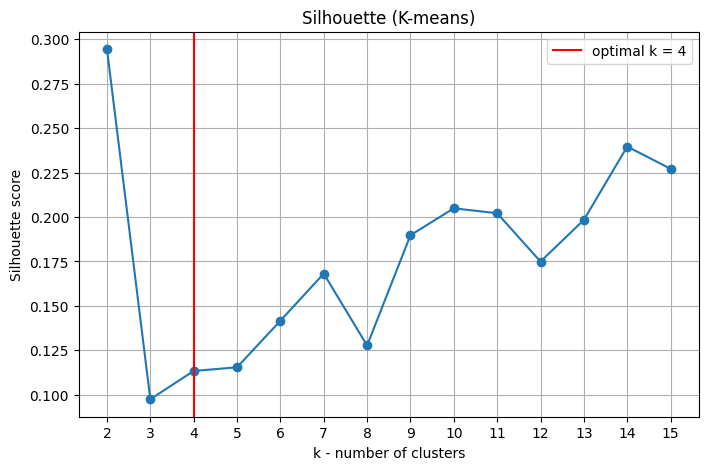

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sil_score, marker='o')
plt.xticks(k_range)
plt.xlabel('k - number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette (K-means)')
plt.grid(True)

best_k = 4
best_score = sil_score[k_range.index(best_k)]
plt.axvline(best_k, color='red', label=f'optimal k = {best_k}')
plt.legend()
plt.show()

In conclusion, 4, 9, 15 clusters give a significant increase in quality.

### K-means for 4 clusters

In [145]:
K = 4
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels_KM_4 = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))

print('df: ', len(df))

Segment 1:  345
Segment 2:  2181
Segment 3:  5845
Segment 4:  225
df:  8596


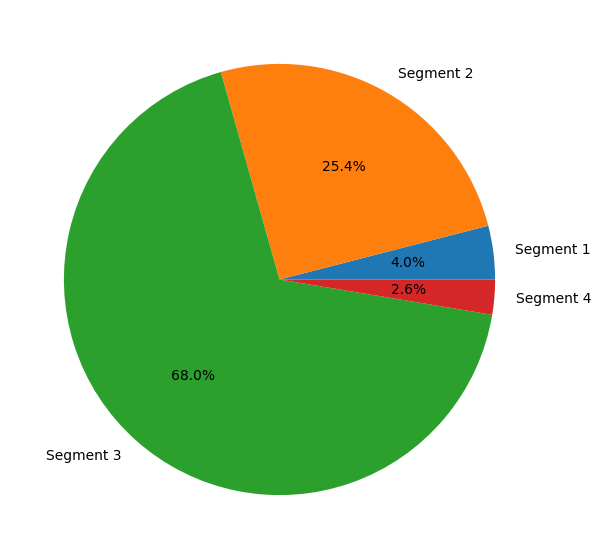

In [146]:
data_sel4={0: df_1, 1: df_2, 2: df_3, 3: df_4}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel4.values()]
labels = [('Segment ' + str(i)) for i in range(1, 5)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [147]:
df.to_excel('labels_for_4_clusters.xlsx')
#сводная таблица данных по всем кластерам
cluster_means = df.groupby('Labels').mean()
cluster_means.index = [f"Segment {i+1}" for i in cluster_means.index]
cluster_means.to_excel('4_clusters_KM_means.xlsx')

### K-means for 9 clusters

In [148]:
K = 9
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels_KM_10 = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))

print('df: ', len(df))

Segment 1:  648
Segment 2:  1037
Segment 3:  1849
Segment 4:  2900
Segment 5:  515
Segment 6:  25
Segment 7:  544
Segment 8:  5
Segment 9:  1073
df:  8596


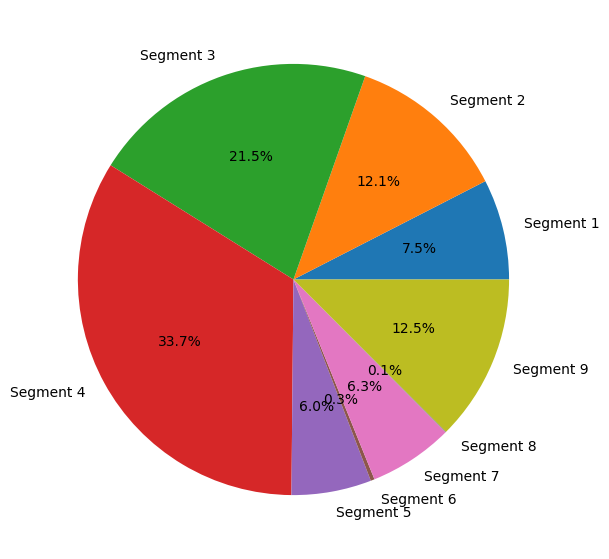

In [149]:
data_sel9={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel9.values()]
labels = [('Segment ' + str(i)) for i in range(1, 10)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

### K-means for 10 clusters

In [150]:
K = 10
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels_KM_10 = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))

print('df: ', len(df))

Segment 1:  2644
Segment 2:  1978
Segment 3:  516
Segment 4:  214
Segment 5:  525
Segment 6:  25
Segment 7:  1061
Segment 8:  83
Segment 9:  936
Segment 10:  614
df:  8596


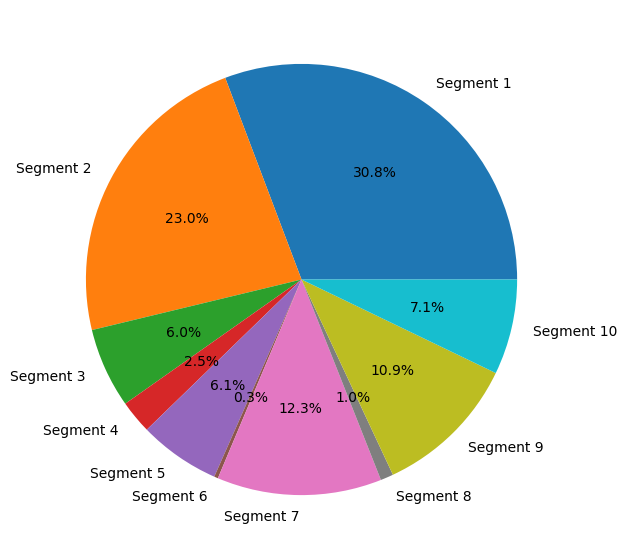

In [151]:
data_sel10={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel10.values()]
labels = [('Segment ' + str(i)) for i in range(1, 11)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [152]:
df.to_excel('labels_for_10_clusters.xlsx')

In [153]:
cluster_means = df.groupby('Labels').mean()
cluster_means.index = [f"Segment {i+1}" for i in cluster_means.index]
cluster_means.to_excel('10_clusters_KM_means.xlsx')

### K-means for 12 clusters

Segment 1:  1345
Segment 2:  1084
Segment 3:  1021
Segment 4:  525
Segment 5:  25
Segment 6:  781
Segment 7:  1597
Segment 8:  478
Segment 9:  521
Segment 10:  5
Segment 11:  970
Segment 12:  244
df:  8596


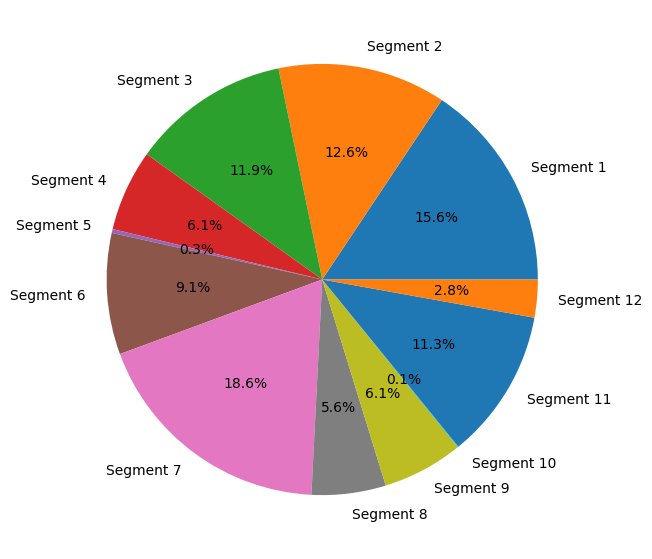

In [154]:
K = 12
kmeanModel = KMeans(n_clusters=K, random_state=7).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels_KM_12 = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))

print('df: ', len(df))

data_sel12={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel12.values()]
labels = [('Segment ' + str(i)) for i in range(1, 13)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [155]:
df.to_excel('labels_for_12_clusters.xlsx')

In [156]:
cluster_means = df.groupby('Labels').mean()
cluster_means.index = [f"Segment {i+1}" for i in cluster_means.index]
cluster_means.to_excel('12_clusters_KM_means.xlsx')

### K-means for 14 clusters

In [157]:
K = 14
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels_KM_14 = kmeanModel.labels_

In [158]:
df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]
df_13 = df[(df['Labels'] == 12)]
df_14 = df[(df['Labels'] == 13)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('Segment 13: ', len(df_13))
print('Segment 14: ', len(df_14))

print('df: ', len(df))

Segment 1:  655
Segment 2:  3041
Segment 3:  255
Segment 4:  585
Segment 5:  411
Segment 6:  494
Segment 7:  24
Segment 8:  809
Segment 9:  840
Segment 10:  987
Segment 11:  83
Segment 12:  4
Segment 13:  194
Segment 14:  214
df:  8596


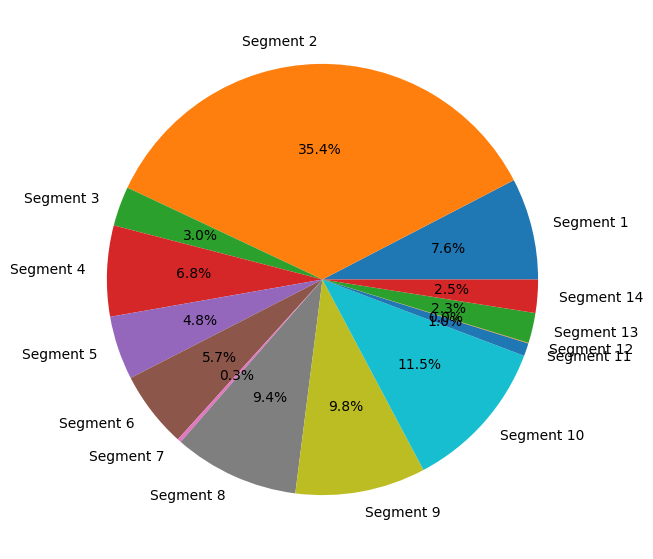

In [159]:
data_sel14={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12, 12: df_13, 13: df_14}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel14.values()]
labels = [('Segment ' + str(i)) for i in range(1, 15)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [160]:
df.to_excel('labels_for_14_clusters.xlsx')

In [161]:
cluster_means = df.groupby('Labels').mean()
cluster_means.index = [f"Segment {i+1}" for i in cluster_means.index]
cluster_means.to_excel('14_clusters_KM_means.xlsx')

In [162]:
df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]
df_13 = df[(df['Labels'] == 12)]
df_14 = df[(df['Labels'] == 13)]
df_15 = df[(df['Labels'] == 14)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('Segment 13: ', len(df_13))
print('Segment 14: ', len(df_14))
print('Segment 15: ', len(df_15))

print('df: ', len(df))

Segment 1:  655
Segment 2:  3041
Segment 3:  255
Segment 4:  585
Segment 5:  411
Segment 6:  494
Segment 7:  24
Segment 8:  809
Segment 9:  840
Segment 10:  987
Segment 11:  83
Segment 12:  4
Segment 13:  194
Segment 14:  214
Segment 15:  0
df:  8596


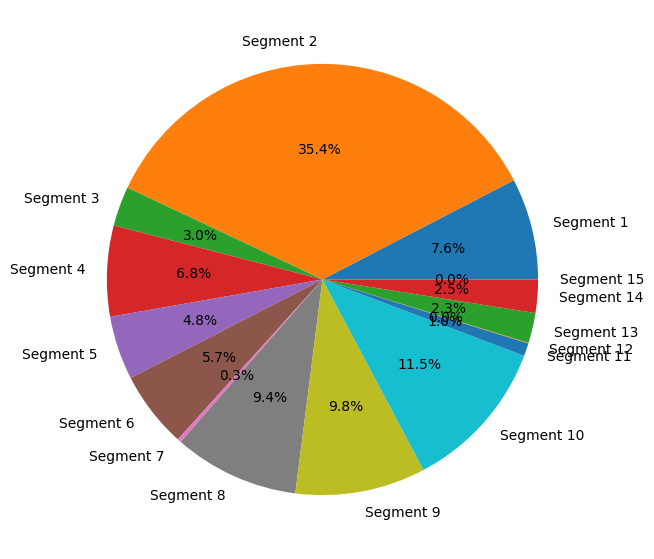

In [163]:
data_sel15={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12, 12: df_13, 13: df_14, 14: df_15}

fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel15.values()]
labels = [('Segment ' + str(i)) for i in range(1, 16)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

# Expectation-Maximization Algorithm

In [164]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

### Davis Boulding

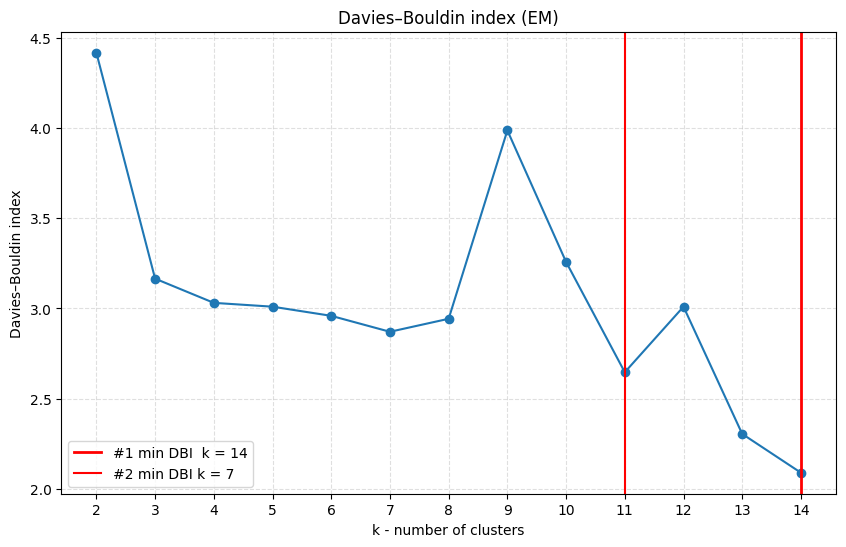

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score

ks = range(2, 15)

db_scores = []
for k in ks:
    gm = GaussianMixture(n_components=k, random_state=42).fit(X)
    labels = gm.predict(X)
    db_scores.append(davies_bouldin_score(X, labels))


optimal_k = ks[int(np.argmin(db_scores))]
optimal_v = min(db_scores)


plt.figure(figsize=(10, 6))
plt.plot(ks, db_scores, marker='o')
plt.axvline(optimal_k, color='red', lw=2, label=f'#1 min DBI  k = {optimal_k}')
plt.axvline(11, 0, 1, label='#2 min DBI k = 7', color='red')

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(ks)
plt.xlabel('k - number of clusters')
plt.ylabel('Davies–Bouldin index')
plt.title('Davies–Bouldin index (EM)')
plt.legend()
plt.show()


###Kalinski-Harabasz

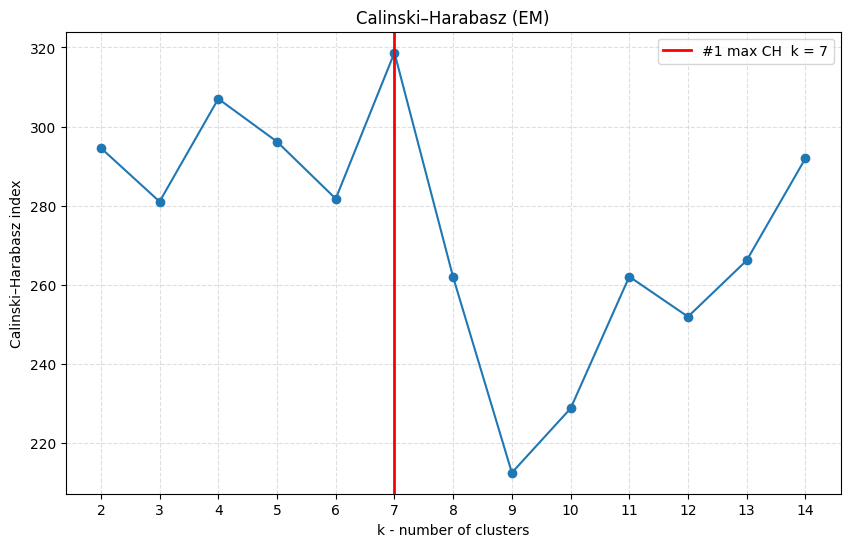

In [166]:
ks, ch_scores = [], []


for k in range(2, 15):
    gm     = GaussianMixture(n_components=k, random_state=42).fit(X)
    labels = gm.predict(X)
    ch     = calinski_harabasz_score(X, labels)

    ks.append(k)
    ch_scores.append(ch)

best_k = ks[int(np.argmax(ch_scores))]
best_v = max(ch_scores)

plt.figure(figsize=(10, 6))
plt.plot(ks, ch_scores, marker='o')
plt.axvline(best_k, color='red', lw=2, label=f'#1 max CH  k = {best_k}')

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(ks)
plt.xlabel('k - number of clusters')
plt.ylabel('Calinski–Harabasz index')
plt.title('Calinski–Harabasz (EM)')
plt.legend()
plt.show()


### Silhouette

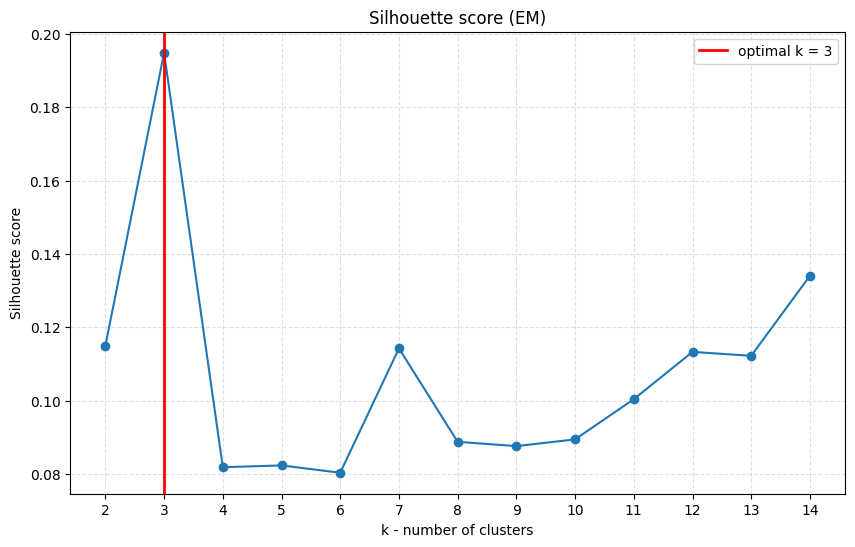

In [167]:
ks, sil_scores = [], []

for k in range(2, 15):
    gm     = GaussianMixture(n_components=k, random_state=42).fit(X)
    labels = gm.predict(X)
    sil    = silhouette_score(X, labels, metric='euclidean')
    ks.append(k)
    sil_scores.append(sil)

best_k = ks[int(np.argmax(sil_scores))]
best_v = max(sil_scores)


plt.figure(figsize=(10, 6))
plt.plot(ks, sil_scores, marker='o')
plt.axvline(best_k, color='red', lw=2, label=f'optimal k = {best_k}')

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(ks)
plt.xlabel('k - number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score (EM)')
plt.legend()
plt.show()


The best index values are observed at 7, 11, 14 clusters

In [168]:
df = df_norm.copy()

In [169]:
import scipy
from sklearn.decomposition import PCA, TruncatedSVD
scipy.stats.normaltest(X)

NormaltestResult(statistic=array([ 2916.64279816,  2394.72268028,  5055.17120238,  9563.65598495,
        3560.07003334,  6383.73786179,  7646.12897101,  3061.33326195,
        5335.26501281,  5065.00421364,  6103.80678339, 18472.52031156,
       24907.62949295,  3078.57004285,  5189.50496008, 14514.74712755,
       24471.41565973,  3794.80357349,  7019.87320193,  2701.69251243,
        5301.6500861 , 10198.48956503, 10977.92215841, 11618.11630732,
        7379.17071543, 25993.00658426, 17392.59173925, 10401.92262552,
        6214.31046691,  5818.86791337]), pvalue=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [170]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

### EM for 7 clusters

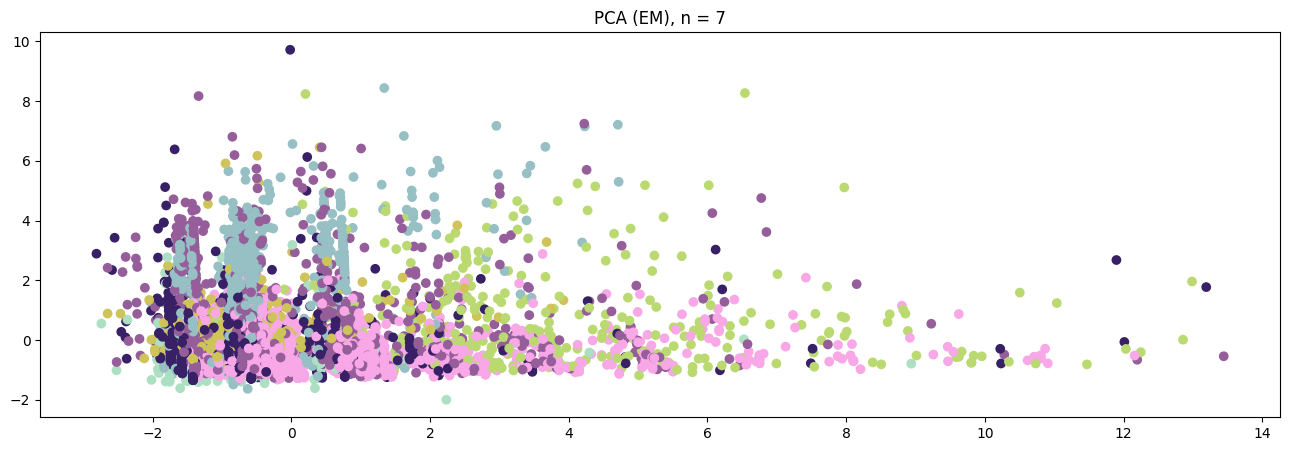

In [171]:
n = 7
gm = GaussianMixture(n_components=n)
labels_EM_7 = gm.fit_predict(X)

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels_EM_7)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels_EM_7))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 7')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [172]:
df['Labels'] = labels_EM_7

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]

data_sel7={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7}

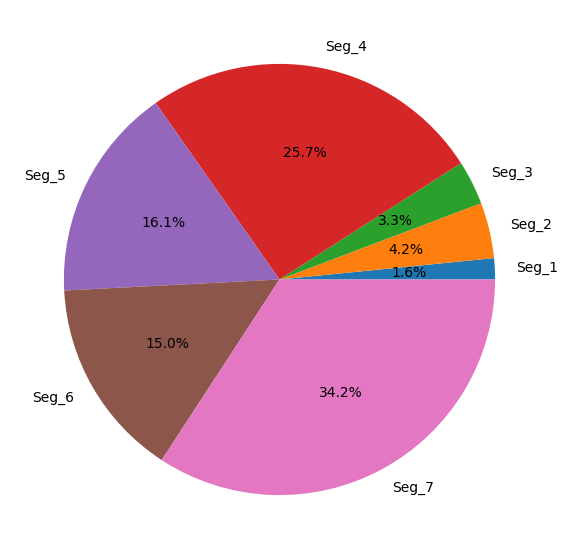

In [173]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel7.values()]
labels = [('Seg_' + str(i)) for i in range(1, 8)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [174]:
#summary table for all clients with cluster numbers according to segmentation
df.to_excel('labels_for_7_klasters_EM.xlsx')

In [175]:
df

,Мелкая бытовая техника,Аксессуары,Цифровая Техника,Климат,Сделай сам,Детские товары,ТВ-Аудио,Крупная бытовая техника,Товары для дома,Спорт и активный отдых,Мебель,"Игры, софт и развлечения",Автотовары,Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Южный ф.о.,Уральский ф.о.,Приволжский ф.о.,Дальневосточный ф.о.,СУММА СКИДКИ,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55575456-52485253545172,1.160155,1.219993,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,0.306473,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.633739,3
55575050-50535349495672,-0.486567,-0.544559,4.474704,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,0.542751,-0.395109,-0.095794,-0.040229,0.483190,-0.307744,0.931638,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,0.500058,2.109759,4
55574954-49565455575577,1.160155,-0.544559,2.053240,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,-0.943856,1.157351,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.109777,-0.184614,-0.474434,-0.729562,3
55574954-50515050575778,-0.486567,1.219993,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,1.877781,-0.05498,-0.025649,1.209917,-0.395109,-0.095794,-0.040229,1.195503,-0.307744,-0.943856,2.779624,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,4.388703,-0.474434,-0.681222,1
55575050-50485353485575,-0.486567,2.984546,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,0.306473,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.780418,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55574950-51555651545278,-0.486567,-0.544559,-0.368224,-0.174947,1.696508,-0.261512,-0.251942,0.589388,-0.33083,-0.315504,-0.277897,-0.05498,-0.025649,0.542751,-0.395109,-0.095794,-0.040229,0.483190,-0.307744,0.931638,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,0.500058,-0.420625,6
55575054-51575355484873,-0.486567,-0.544559,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,3.400879,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-1.653750,1.937901,-0.943856,-0.464922,-0.188374,3.704807,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.717143,2
55575054-52515554505776,-0.486567,-0.544559,-0.368224,-0.174947,-0.395253,-0.261512,-0.251942,-0.444735,-0.33083,3.400879,-0.277897,-0.05498,-0.025649,-0.124414,-0.395109,-0.095794,-0.040229,-0.229124,-0.307744,0.306473,-0.464922,-0.188374,-0.173004,-0.151419,-0.296013,-0.026014,-0.223170,-0.184614,-0.474434,-0.777635,6


### EM for 11 clusters

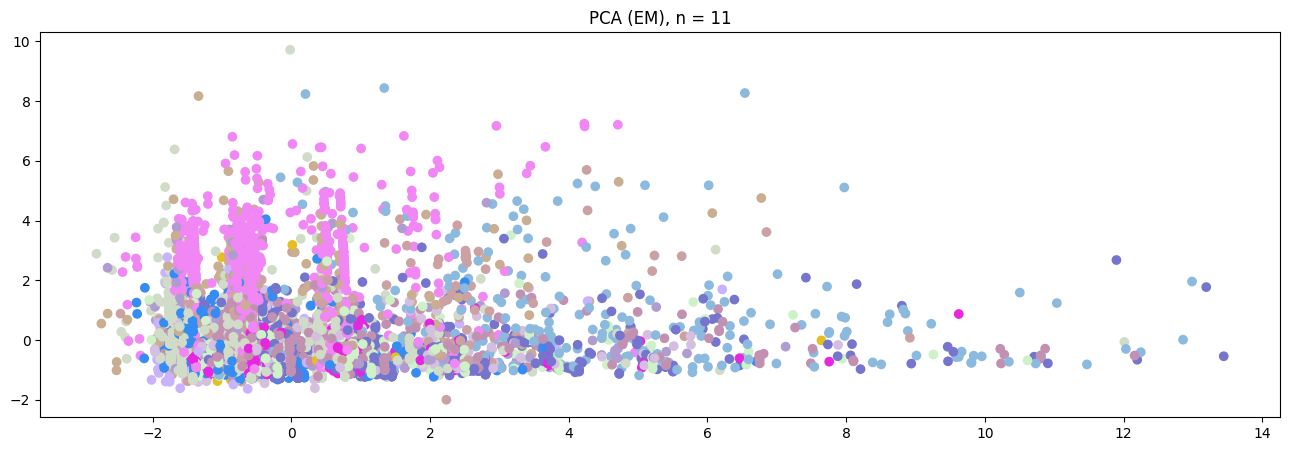

In [176]:
n = 11
gm = GaussianMixture(n_components=K, random_state=42)
labels_EM_11 = gm.fit_predict(X)

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels_EM_11)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels_EM_11))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 11')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [177]:
df['Labels'] = labels_EM_11

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]

data_sel12={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11}

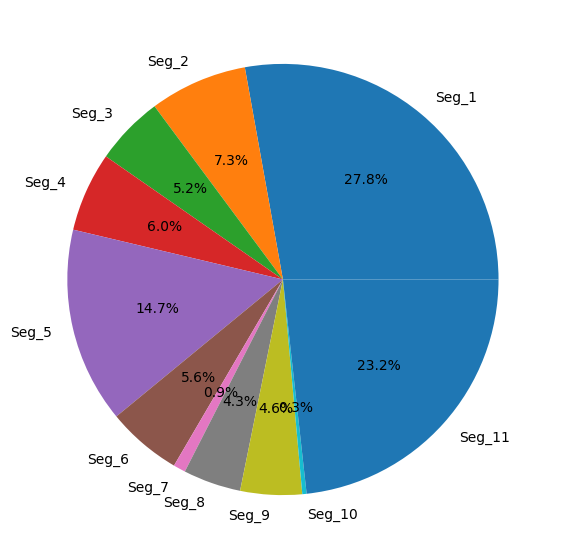

In [178]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel12.values()]
labels = [('Seg_' + str(i)) for i in range(1, 12)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

### EM for 12 clusters

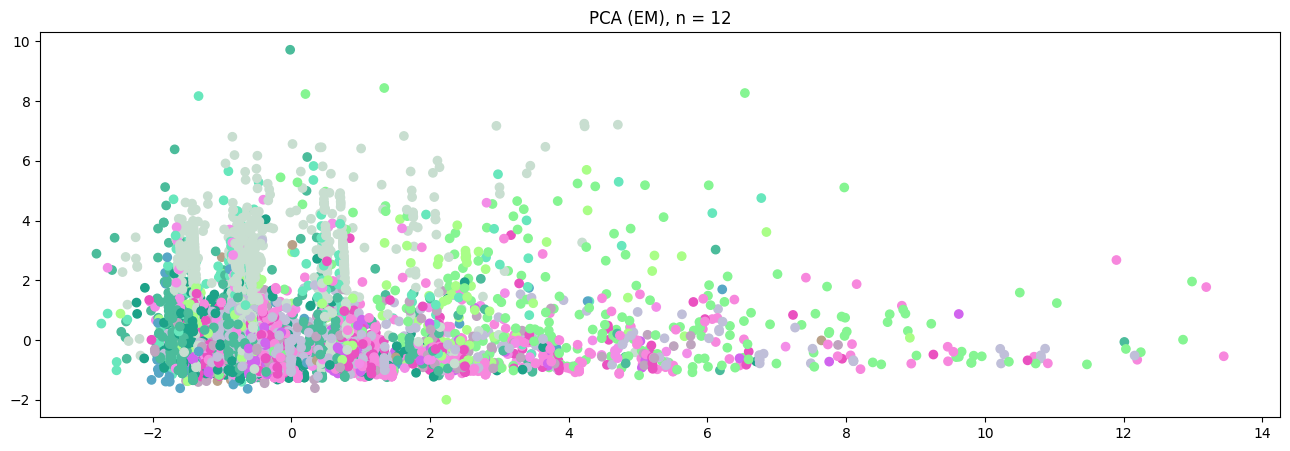

In [179]:
n = 12
gm = GaussianMixture(n_components=K, random_state=42)
labels_EM_12 = gm.fit_predict(X)

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels_EM_12)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels_EM_12))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 12')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [180]:
df['Labels'] = labels_EM_12

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]

data_sel12={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12}

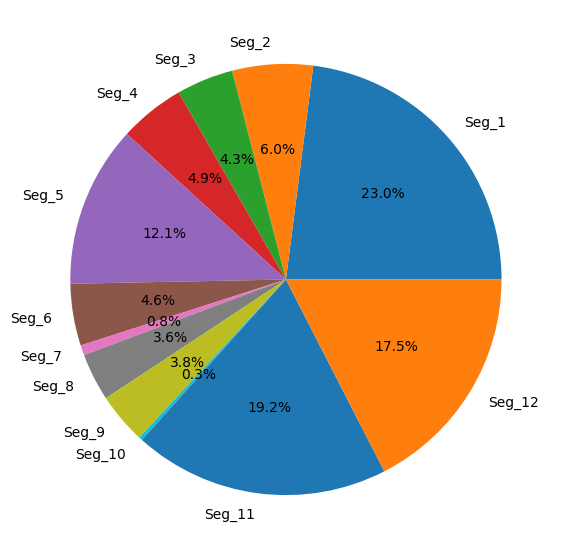

In [181]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel12.values()]
labels = [('Seg_' + str(i)) for i in range(1, 13)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [182]:
#table for all clients with cluster numbers according to segmentation
df.to_excel('labels_for_12_klasters_EM.xlsx')

In [183]:
# List of numeric columns (except Labels)
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Labels')

# Creating a summary table: averaging each segment
pivot = df.groupby('Labels')[numeric_cols].mean().round(3).reset_index()

output_path = 'pivot_12_labels_by_segment.xlsx'
pivot.to_excel(output_path, index=False)

pivot.head()

,Labels,Мелкая бытовая техника,Аксессуары,Цифровая Техника,Климат,Сделай сам,Детские товары,ТВ-Аудио,Крупная бытовая техника,Товары для дома,Спорт и активный отдых,Мебель,"Игры, софт и развлечения",Автотовары,Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Южный ф.о.,Уральский ф.о.,Приволжский ф.о.,Дальневосточный ф.о.,СУММА СКИДКИ,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
0,0,0.996,-0.545,-0.368,-0.175,-0.395,-0.262,-0.252,1.261,-0.331,-0.316,-0.278,-0.055,-0.026,-0.195,0.009,-0.096,-0.04,-0.240,0.028,-0.146,0.037,-0.188,-0.056,0.008,0.009,-0.026,0.019,-0.185,-0.198,0.677
1,1,-0.487,-0.545,-0.368,-0.175,-0.395,4.111,-0.252,-0.445,-0.331,-0.316,-0.278,-0.055,-0.026,-0.040,-0.106,-0.096,-0.04,-0.025,-0.173,-0.099,-0.057,-0.004,0.118,-0.042,0.002,-0.026,-0.018,-0.121,-0.105,-0.375
2,2,-0.088,-0.177,-0.095,-0.156,0.229,-0.229,-0.216,0.179,-0.045,0.301,0.023,-0.038,-0.026,0.083,-0.124,0.047,-0.04,0.064,-0.091,-0.944,-0.465,4.545,-0.173,-0.151,-0.296,-0.026,0.083,-0.005,0.024,-0.062
3,3,0.001,0.058,-0.221,-0.175,-0.317,-0.262,-0.083,-0.052,0.610,0.515,-0.148,-0.055,-0.026,-1.459,2.236,-0.096,-0.04,0.095,-0.212,0.314,-0.179,-0.188,-0.019,-0.151,-0.182,-0.026,-0.223,-0.185,0.052,-0.026
4,4,-0.487,-0.545,-0.368,-0.175,2.692,-0.262,-0.252,-0.395,-0.331,-0.316,-0.278,-0.055,-0.026,-0.003,-0.007,-0.096,-0.04,0.052,-0.125,-0.006,-0.047,-0.188,0.127,0.008,0.078,-0.026,-0.149,-0.185,0.068,-0.330


### EM for 14 clusters

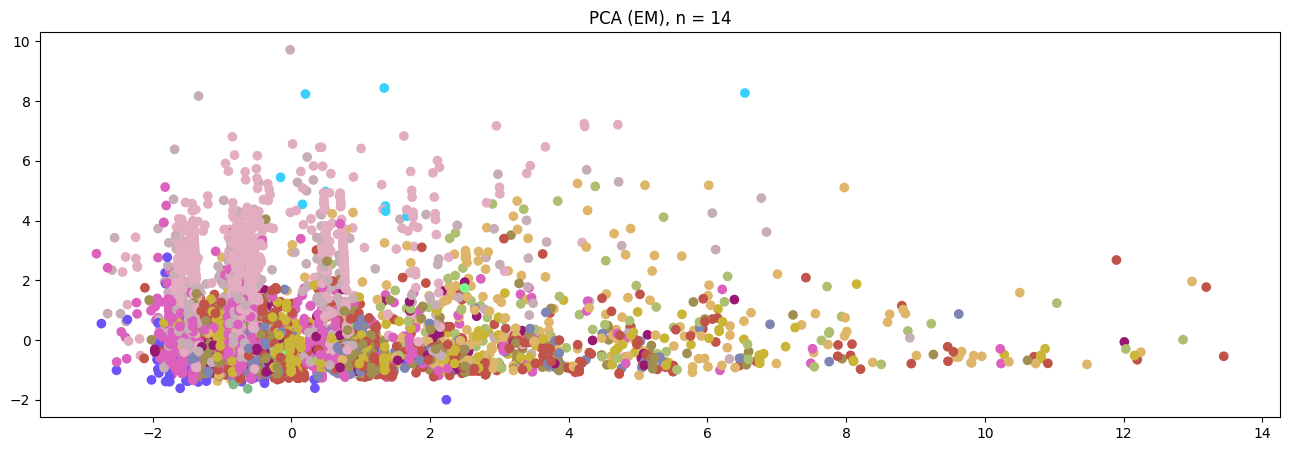

In [184]:
n = 14
gm = GaussianMixture(n_components=n)
labels_EM_14 = gm.fit_predict(X)

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels_EM_14)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels_EM_14))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 14')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [185]:
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]
df_13 = df[(df['Labels'] == 12)]
df_14 = df[(df['Labels'] == 13)]

data_sel13={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12, 12: df_13, 13: df_14}

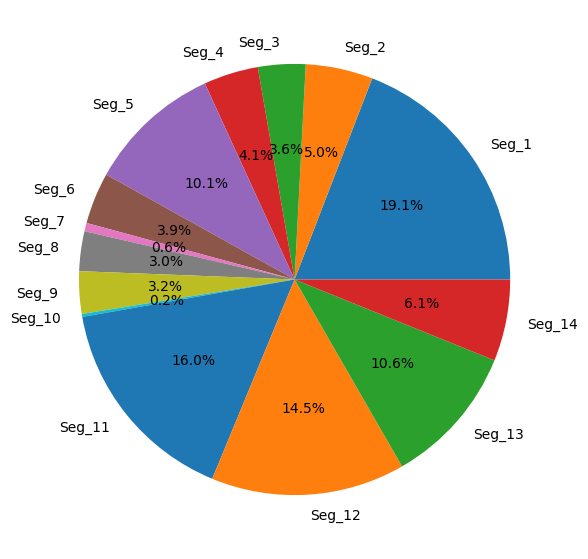

In [186]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel13.values()]
labels = [('Seg_' + str(i)) for i in range(1, 15)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [187]:
#summary table for all clients with cluster numbers according to segmentation
df.to_excel('labels_for_14_klasters_EM.xlsx')